In [38]:
using Pkg
pkg"activate ."
pkg"add Plots"
pkg"add NLPModels"
pkg"add NLPModelsJuMP"
pkg"add JuMP"
pkg"add JSOSolvers"
pkg"add CaNNOLeS"

 Activating environment at `~/Documents/streaming/notebooks/tutorials/nonlinear-least-squares/Project.toml`
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/nonlinear-least-squares/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/nonlinear-least-squares/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/nonlinear-least-squares/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/nonlinear-least-squares/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/nonlinear-least-squares/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/nonlinear-least-squares/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/nonlinear-least-squares/Project.toml`
 [no changes]
   Updating 

In [3]:
pkg"status"

Status `~/Documents/streaming/notebooks/tutorials/nonlinear-least-squares/Project.toml`
  [a4795742] NLPModels v0.12.2
  [91a5bcdd] Plots v1.2.0


$$ \min\ \tfrac{1}{2}\|F(x)\|^2 $$

$$ F:\mathbb{R}^n\to\mathbb{R}^m $$

Rosenbrock: $f(x) = (x_1 - 1)^2 + 100 (x_2 - x_1^2)^2$.

In [4]:
F(x) = [x[1] - 1; 10 * (x[2] - x[1]^2)]
F([1.0; 1.0])

2-element Array{Float64,1}:
 0.0
 0.0

In [5]:
using NLPModels

In [7]:
AbstractNLSModel <: AbstractNLPModel

true

In [8]:
nls = ADNLSModel(x -> [x[1] - 1; 10 * (x[2] - x[1]^2)], # F
                 [-1.2; 1.0], # x₀
                 2) # nequ

ADNLSModel(Minimization problem Generic
nvar = 2, ncon = 0 (0 linear)
, NLSMeta(2, 2, [0.0, 0.0], 4, 3), NLSCounters(Counters(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 0, 0, 0, 0, 0, 0, 0), var"#3#4"(), NLPModels.var"#6#8"())

In [9]:
x = nls.meta.x0
residual(nls, x)

2-element Array{Float64,1}:
 -2.2
 -4.3999999999999995

In [10]:
jac_residual(nls, x)

2×2 Array{Float64,2}:
  1.0   0.0
 24.0  10.0

In [11]:
jprod_residual(nls, x, ones(2))

2-element Array{Float64,1}:
  1.0
 34.0

In [12]:
jtprod_residual(nls, x, ones(2))

2-element Array{Float64,1}:
 25.0
 10.0

In [14]:
?hess_residual

search: hess_residual hess_op_residual hess_op_residual! jth_hess_residual



```
H = hess_residual(nls, x, v)
```

Computes the linear combination of the Hessians of the residuals at `x` with coefficients `v`.


$$ \sum_{i=1}^m v_i \nabla^2 F_i(x) $$

In [15]:
hess_residual(nls, x, ones(2))

2×2 Array{Float64,2}:
 -20.0  0.0
   0.0  0.0

In [16]:
obj(nls, x)

12.099999999999998

In [18]:
using LinearAlgebra

norm(residual(nls, x))^2 / 2

12.099999999999998

In [19]:
grad(nls, x)

2-element Array{Float64,1}:
 -107.8
  -43.99999999999999

In [20]:
jac_residual(nls, x)' * residual(nls, x)

2-element Array{Float64,1}:
 -107.8
  -43.99999999999999

$$ \nabla^2 f(x) = J(x)^T J(x) + \sum_{i=1}^m F_i(x) \nabla^2 F_i(x) $$

In [21]:
hess(nls, x)

2×2 Array{Float64,2}:
 665.0    0.0
 240.0  100.0

In [22]:
hess_residual(nls, x, residual(nls, x)) + jac_residual(nls, x)' * jac_residual(nls, x)

2×2 Array{Float64,2}:
 665.0  240.0
 240.0  100.0

**Basic API**

- residual
- jac_residual, jprod_residual, jtprod_residual
- hess_residual, hprod_residual

In [26]:
using JuMP, NLPModelsJuMP

┌ Info: Precompiling NLPModelsJuMP [792afdf1-32c1-5681-94e0-d7bf7a5df49e]
└ @ Base loading.jl:1260


In [30]:
model = Model()

x0 = [-1.2; 1.0]
@variable(model, x[i=1:2], start=x0[i])

@NLexpression(model, F1, x[1] - 1)
@NLexpression(model, F2, 10 * (x[2] - x[1]^2))

nls = MathOptNLSModel(model, [F1, F2], name="rosenbrock-nls")

MathOptNLSModel(Minimization problem rosenbrock-nls
nvar = 2, ncon = 0 (0 linear)
, NLSMeta(2, 2, [0.0, 0.0], 3, 1), "A JuMP.NLPEvaluator", "A JuMP.NLPEvaluator", NLPModelsJuMP.LinearConstraints(Int64[], Int64[], Float64[]), NLSCounters(Counters(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 0, 0, 0, 0, 0, 0, 0))

In [31]:
residual(nls, nls.meta.x0)

2-element Array{Float64,1}:
 -2.2
 -4.3999999999999995

In [32]:
residual(nls, ones(2))

2-element Array{Float64,1}:
 0.0
 0.0

In [33]:
jac_residual(nls, ones(2))

2×2 SparseArrays.SparseMatrixCSC{Float64,Int64} with 3 stored entries:
  [1, 1]  =  1.0
  [2, 1]  =  -20.0
  [2, 2]  =  10.0

In [34]:
obj(nls, ones(2))

0.0

$$ \frac{1}{1 + e^{-\beta_0 - \beta_1 x_i}} \approx y_i $$

In [ ]:
using Plots
gr(size=(400,300))

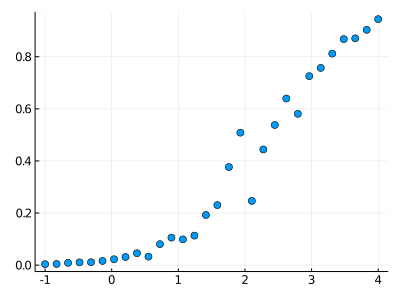

In [56]:
using Random
Random.seed!(0)
# Fake data
n = 30
x = range(-1, 4, length=n)
y = 1 ./ (1 .+ exp.(3.8 .- 1.6x + randn(n) * 0.3) )

scatter(x, y, leg=false)

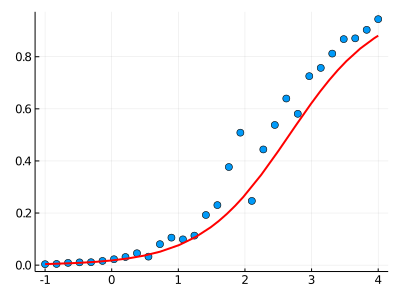

In [58]:
h(β, x) = 1 / (1 + exp(-β[1] - β[2] * x))
scatter(x, y, leg=false)
plot!(x -> h([-4; 1.5], x), extrema(x)..., lw=2, c=:red)

In [60]:
model = Model()

@variable(model, β[1:2])

@NLexpression(model, res[i=1:n], 1 / (1 + exp(-β[1] - β[2] * x[i])) - y[i])

nls = MathOptNLSModel(model, res, name="logistic")

MathOptNLSModel(Minimization problem logistic
nvar = 2, ncon = 0 (0 linear)
, NLSMeta(30, 2, [0.0, 0.0], 60, 90), "A JuMP.NLPEvaluator", "A JuMP.NLPEvaluator", NLPModelsJuMP.LinearConstraints(Int64[], Int64[], Float64[]), NLSCounters(Counters(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 0, 0, 0, 0, 0, 0, 0))

In [61]:
nls.meta.x0

2-element Array{Float64,1}:
 0.0
 0.0

In [62]:
residual(nls, nls.meta.x0)

30-element Array{Float64,1}:
  0.4963294345174588
  0.4953796877738974
  0.4913574170529111
  0.48935494433170035
  0.48871059340224865
  0.4838553539972141
  0.47734173867560514
  0.46881874119265154
  0.4542982791245073
  0.46737604426140994
  0.4194358987438368
  0.39441712848326976
  0.40104588232186816
  ⋮
  0.253497322371081
  0.055897548591342716
 -0.038022113815881164
 -0.1395656694590015
 -0.08085459869373701
 -0.22540094580638714
 -0.25710078533209557
 -0.3120102038300201
 -0.36758572236159626
 -0.37058730524905104
 -0.40326736413151465
 -0.4442125896063588

In [63]:
residual(nls, [-4.0; 1.5])

30-element Array{Float64,1}:
  0.0003995722333549243
  0.0006447711211317536
 -0.0018341299902898019
 -0.0018448229665715427
  7.862191708041602e-5
 -0.0014706636587463531
 -0.003735317532772491
 -0.006809466592563308
 -0.014362208010174723
  0.007593184468268878
 -0.029088183817069763
 -0.03991194618580937
 -0.015518094684008263
  ⋮
  0.05401633610626183
 -0.08659681055060503
 -0.11919406196889426
 -0.1568002183361965
 -0.03358241548152474
 -0.11517171920871894
 -0.08738573643098224
 -0.0877851160220553
 -0.0947947938413708
 -0.05559841272002153
 -0.0524051853492401
 -0.06341551162847647

In [ ]:
using JSOSolvers

In [65]:
output = trunk(nls)

┌ Info:   iter      f(x)      ‖∇f‖         Δ      step     ratio   inner      bk         cgstatus  
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/acVNi/src/trunkls.jl:76
┌ Info:      0   2.0e+00   2.1e+00   1.0e+00   1.0e+00   9.6e-01       3       0  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/acVNi/src/trunkls.jl:170
┌ Info:      1   7.2e-01   8.3e-01   1.5e+00   1.5e+00   9.7e-01       3       0  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/acVNi/src/trunkls.jl:170
┌ Info:      2   1.1e-01   1.4e-01   2.3e+00   1.1e+00   9.7e-01       3       0  found approximate minimum least-squares solution
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/acVNi/src/trunkls.jl:170
┌ Info:      3   3.9e-02   1.8e-02   2.3e+00   3.0e-01   9.6e-01       3       0  found approximate minimum least-squares solution
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/acVNi/src/trunkls.jl:170
┌ Info:      4   3.7e-02   1.7e-03 

"Execution stats: first-order stationary"

In [66]:
print(output)

Generic Execution stats
  status: first-order stationary
  objective value: 0.03661044645143596
  primal feasibility: 0.0
  dual feasibility: 1.745313399504062e-8
  solution: [-3.5618463462385628  1.5091729810159678]
  iterations: 7
  elapsed time: 0.0008931159973144531


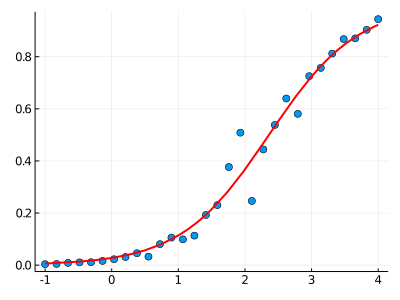

In [67]:
β = output.solution
scatter(x, y, leg=false)
plot!(x -> h(β, x), extrema(x)..., lw=2, c=:red)

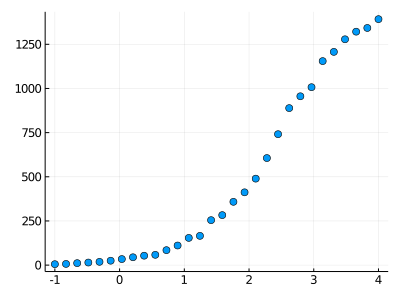

In [78]:
using Random
Random.seed!(0)
# Fake data
n = 30
x = range(-1, 4, length=n)
y = 1500 ./ (1 .+ exp.(3.8 .- 1.6x + rand(n) * 0.3) )

scatter(x, y, leg=false)

In [89]:
model = Model()

@variable(model, β[1:3])
set_upper_bound(β[1], 0.0)

@NLexpression(model, res[i=1:n], β[3] / (1 + exp(-β[1] - β[2] * x[i])) - y[i])

nls = MathOptNLSModel(model, res, name="logistic")

MathOptNLSModel(Minimization problem logistic
nvar = 3, ncon = 0 (0 linear)
, NLSMeta(30, 3, [0.0, 0.0, 0.0], 90, 180), "A JuMP.NLPEvaluator", "A JuMP.NLPEvaluator", NLPModelsJuMP.LinearConstraints(Int64[], Int64[], Float64[]), NLSCounters(Counters(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 0, 0, 0, 0, 0, 0, 0))

In [93]:
nls.meta.uvar

3-element Array{Float64,1}:
  0.0
 Inf
 Inf

In [94]:
has_bounds(nls)

true

In [95]:
using Logging
output = with_logger(NullLogger()) do
    tron(nls)
end
print(output)

Generic Execution stats
  status: first-order stationary
  objective value: 4589.893297775724
  primal feasibility: 0.0
  dual feasibility: 4.935815827459923e-7
  solution: [-4.08037573799231  1.6459401973918577  1510.0559714314]
  iterations: 53
  elapsed time: 0.00999307632446289


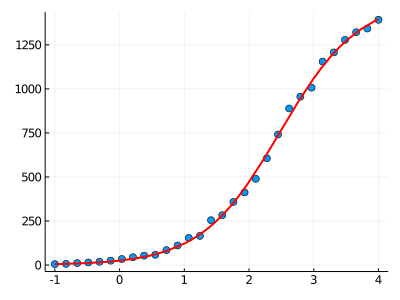

In [97]:
β = output.solution
h(β, x) = β[3] / (1 + exp(-β[1] - β[2] * x))
scatter(x, y, leg=false)
plot!(x -> h(β, x), extrema(x)..., lw=2, c=:red)

In [103]:
model = Model()

@variable(model, β[1:3])

@NLexpression(model, res[i=1:n], β[3] / (1 + exp(-β[1] - β[2] * x[i])) - y[i])
@NLconstraint(model, β[1]^2 + β[2]^2 == 1.0)

nls = MathOptNLSModel(model, res, name="logistic")

MathOptNLSModel(Minimization problem logistic
nvar = 3, ncon = 1 (0 linear)
, NLSMeta(30, 3, [0.0, 0.0, 0.0], 90, 180), "A JuMP.NLPEvaluator", "A JuMP.NLPEvaluator", NLPModelsJuMP.LinearConstraints(Int64[], Int64[], Float64[]), NLSCounters(Counters(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 0, 0, 0, 0, 0, 0, 0))

In [104]:
cons(nls, nls.meta.x0)

1-element Array{Float64,1}:
 -1.0

In [105]:
using CaNNOLeS
# Constrained and NoNlinear Least Squares

In [107]:
output = with_logger(NullLogger()) do
    cannoles(nls)
end
print(output)

Generic Execution stats
  status: first-order stationary
  objective value: 1.4287086867237806e6
  primal feasibility: 4.899207040054421e-9
  dual feasibility: 2.5797635316848755e-7
  solution: [-0.7768420893887694  0.6296954605627217  1077.1508080598064]
  iterations: -1
  elapsed time: 0.0065081119537353516
  solver specific:
    nlinsolve: 43
    nfact: 58
    multipliers: [-576005.9291702554]
    nbk: 7
    internal_msg: ""


**Thurber**

https://www.itl.nist.gov/div898/strd/nls/data/thurber.shtml

In [108]:
using CSV

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260


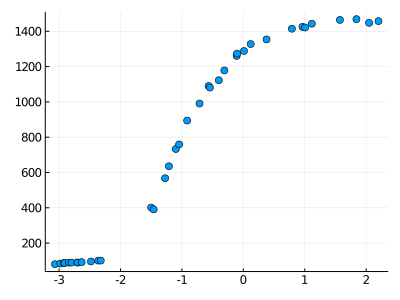

In [110]:
data = CSV.read("thurber.csv")
x = data.x
y = data.y

scatter(x, y, leg=false)

In [114]:
model = Model()

β0 = [1000; 1000; 400; 40; 0.7; 0.3; 0.03]
@variable(model, β[i=1:7], start=β0[i])

@NLexpression(model, res[i=1:n], (β[1] + β[2] * x[i] + β[3] * x[i]^2 + β[4] * x[i]^3) / (1 + β[5] * x[i] + β[6] * x[i]^2 + β[7] * x[i]^3) - y[i])

nls = MathOptNLSModel(model, res, name="thurber")

MathOptNLSModel(Minimization problem thurber
nvar = 7, ncon = 0 (0 linear)
, NLSMeta(30, 7, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 210, 840), "A JuMP.NLPEvaluator", "A JuMP.NLPEvaluator", NLPModelsJuMP.LinearConstraints(Int64[], Int64[], Float64[]), NLSCounters(Counters(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 0, 0, 0, 0, 0, 0, 0))

In [132]:
output = with_logger(NullLogger()) do
    trunk(nls, max_time=3.0, atol=1e-4, rtol=0.0)
end

"Execution stats: maximum elapsed time"

In [133]:
print(output)

Generic Execution stats
  status: maximum elapsed time
  objective value: 2128.396250687807
  primal feasibility: 0.0
  dual feasibility: 0.018444610822101366
  solution: [1282.1621204430292  1493.6039640072445  587.6314358427045  75.5731446503069 ⋯ 0.03222886234390123]
  iterations: 16508
  elapsed time: 3.0001580715179443


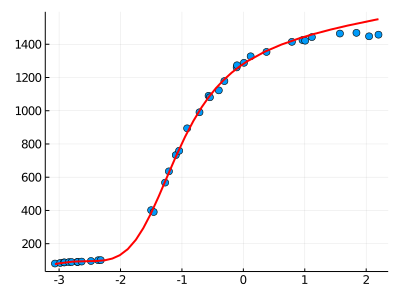

In [134]:
scatter(x, y, leg=false)
h(β, x) = (β[1] + β[2] * x + β[3] * x^2 + β[4] * x^3) / (1 + β[5] * x + β[6] * x^2 + β[7] * x^3)
β = output.solution
plot!(x -> h(β, x), extrema(x)..., lw=2, c=:red)